**Introduction**

Myocardial Infarction (MI), commonly known as a heart attack, is one of the most significant health challenges in modern medicine.

MI is associated with high mortality, especially within the first year after the initial event. In countries with highly urbanized populations, the incidence of MI remains high due to factors such as chronic stress and poor diet. In the United States alone, more than a million people suffer from MI each year, with many not surviving before reaching the hospital.

The development of complications after an MI, such as chronic heart failure, poses additional risks to patient health.
Predicting the likelihood of these complications early can enable healthcare providers to take preventive measures, improving patient outcomes and reducing the burden on healthcare systems.

This analysis focuses on predicting the complication of chronic heart failure (denoted as 'ZSN') at the end of the third day after hospital admission, utilizing data from the "Myocardial Infarction Complications" dataset.


**Work Methodology:**

CRISP-DM

##**I. Business Understanding**

**Study of the Field:**

Context and Importance: Myocardial infarction, commonly known as a heart attack, is a serious medical condition where the blood supply to the heart muscle is blocked, causing damage. Patients who survive a heart attack may develop various complications, such as cardiac arrhythmias, heart failure, or other severe conditions that require prompt and appropriate care.

Complications following a heart attack, such as heart failure, arrhythmias, and strokes, can significantly impact the quality of life for patients. Predicting these complications is essential to improving clinical outcomes and optimizing care.


**Business Objective :** classify patient outcomes based on their medical information.

**DS Objective:** build a predictive model that classifies patient outcomes based on their medical data, identifying key factors that influence these outcomes to support informed decision-making in healthcare.


from imblearn.over_sampling import SMOTE


In [ ]:

!pip install prettytable
!pip install  imbalanced-learn

In [ ]:
import pandas as pd # algebraic computations , read and write to csv

import numpy as np # linear algebra and arrays muniplication

import time                               # measure excution time of some functions

############  importing the data visualization libraries :##############

import matplotlib.pyplot as plt
import seaborn as sns

############  Import Classifiers #################

from sklearn.svm import  SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
############  Import Data Visualization  #################
import seaborn as sns
import matplotlib.pyplot as plt

# Measure excution time
import time
############  Import Make Pipeline  #################
from sklearn.pipeline import make_pipeline

# Importing a model to split the training set from the evaluation set
from sklearn.model_selection import train_test_split

# feature Extraction and feature engineering :

from sklearn.preprocessing import  StandardScaler


############  Evaluation Metric  #################
from sklearn.metrics import f1_score , make_scorer , roc_auc_score, average_precision_score , accuracy_score

############  GridSearchCV #################
from sklearn.model_selection import GridSearchCV

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

In [ ]:

# fetch dataset
myocardial_infarction_complications = fetch_ucirepo(id=579)

# data (as pandas dataframes)
X = myocardial_infarction_complications.data.features
y = myocardial_infarction_complications.data.targets

# metadata
print(myocardial_infarction_complications.metadata)

# variable information
print(myocardial_infarction_complications.variables)

{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_paper': {'ID'

##**II. Data Understanding**

## 1-Description

In [ ]:
df = pd.concat([X, y], axis=1)
print(f'the data set is of shape {df.shape} \n')
df.head(5)

the data set is of shape (1700, 123) 



,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#  exploring general Features Data types
# The data set contains  float64(110), int64(14) Features
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 123 entries, AGE to LET_IS
dtypes: float64(110), int64(13)
memory usage: 1.6 MB


In [ ]:
# exploring general statistics about the data set ( Features Data types, Mean , Max , min ....)
# we can see that some features clearly contain NAN values
df.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
count,1692.000000,1700.000000,1696.000000,1594.000000,1627.000000,1649.000000,72.00000,1691.000000,1692.000000,1452.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,0.37500,1.393258,0.033688,3.340220,...,0.024706,0.041765,0.033529,0.093529,0.031765,0.044118,0.231765,0.093529,0.087059,0.477059
std,11.259936,0.483883,0.836801,2.440586,1.040814,0.801400,0.48752,1.088803,0.180478,3.098646,...,0.155273,0.200110,0.180067,0.291259,0.175425,0.205417,0.422084,0.291259,0.282004,1.381818
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,1.000000,2.000000,1.000000,0.00000,2.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,1.00000,2.000000,0.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,1.00000,3.000000,1.000000,7.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.shape

(1700, 123)

In [ ]:
# splitting the features from targets
features_Indc = np.arange(0,111)
Target_Indc = np.arange(111,123)
targets  = df.iloc[: , Target_Indc].columns.tolist()
features  = df.iloc[: , features_Indc].columns.tolist()

In [ ]:
# The target variables doesn't contain any missing values
df[targets].isna().sum()

,0
FIBR_PREDS,0
PREDS_TAH,0
JELUD_TAH,0
FIBR_JELUD,0
A_V_BLOK,0
OTEK_LANC,0
RAZRIV,0
DRESSLER,0
ZSN,0
REC_IM,0


In [ ]:
df[targets].nunique()

,0
FIBR_PREDS,2
PREDS_TAH,2
JELUD_TAH,2
FIBR_JELUD,2
A_V_BLOK,2
OTEK_LANC,2
RAZRIV,2
DRESSLER,2
ZSN,2
REC_IM,2


## 2- Missing Values

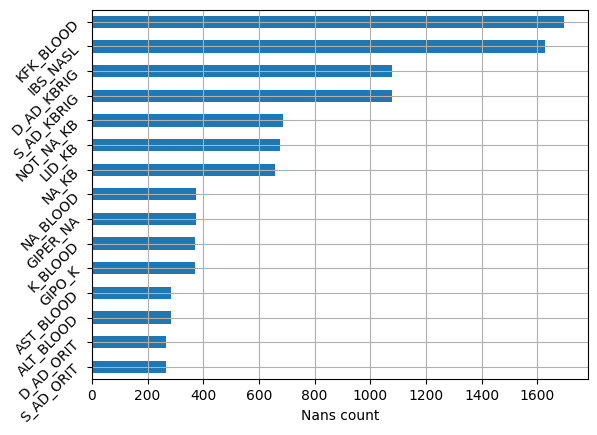

In [ ]:
# show the top 15 features with missing values
df[features].isna().sum(axis=0).nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('Nans count')
plt.yticks(rotation=45)

plt.show()

In [ ]:
# extract the features with very high percentage of missing values
# we make a function to map the features with high numbe of NAN to 'Nan' and 'OK' otherwise
def ExtractNans(x):
    isnan = False
    if x > 0.3 :
        isnan = True
    return isnan
df_sorted_by_nans = df[features].isna().sum(axis=0).divide(len(df)).sort_values(ascending=False)

In [ ]:
# we found 7 features with more than 30% of NANs
df_sorted_by_nans.apply(ExtractNans).sum(axis=0)

7

In [ ]:
# Drop features with >30% missing data to avoid model uncertainty and reduce bias from imputation.

f_to_drop = df_sorted_by_nans[df_sorted_by_nans.apply(ExtractNans) == True].index.tolist()
print(f_to_drop)

['KFK_BLOOD', 'IBS_NASL', 'D_AD_KBRIG', 'S_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB']


## 3-Cardinality check

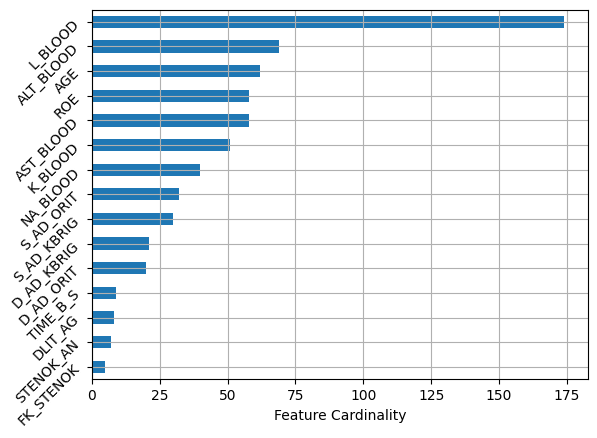

,0
L_BLOOD,174
ALT_BLOOD,69
AGE,62
ROE,58
AST_BLOOD,58
...,...
ritm_ecg_p_04,2
ritm_ecg_p_02,2
ritm_ecg_p_01,2
IM_PG_P,2


In [ ]:
# plot the feature cardinality in descending order
df[features].nunique().nlargest(15).sort_values().plot(kind='barh')
plt.grid()
plt.xlabel('Feature Cardinality')
plt.yticks(rotation=45)
plt.show()
df.nunique().sort_values(ascending=False)

In [ ]:
# extract the Binary features
feature_cardinality = df[features].nunique()
Binary = feature_cardinality[feature_cardinality == 2].index.tolist()
print(f'We found {len(Binary)} Binary_features including : \n {Binary[:10]} ....' )

We found 78 Binary_features including : 
 ['SEX', 'IBS_NASL', 'SIM_GIPERT', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08'] ....


##III. Data Preperation

**1-Handling missing values:**

In [ ]:
# Remove columns with many NANs :
print(f'The dropped columns are {f_to_drop}')
df_features = df[features].copy(deep=True).drop(columns = f_to_drop , axis = 0)

The dropped columns are ['KFK_BLOOD', 'IBS_NASL', 'D_AD_KBRIG', 'S_AD_KBRIG', 'NOT_NA_KB', 'LID_KB', 'NA_KB']


In [ ]:
df_features.shape

(1700, 104)

**A- Binary Features**

In [ ]:
# Calculate the cardinality of features and identify binary features (features with exactly 2 unique values).
# Store the names of binary features in a list and return the count of such features.
feature_cardinality = df_features.nunique()
Binary_features = feature_cardinality[feature_cardinality == 2].index.tolist()
len(Binary_features)

74

kadeh ana men wehed fih missing value bel pourcentage

In [ ]:
df_features[Binary_features].isna().sum().sort_values(ascending = False)*100/len(df_features)

,0
GIPER_NA,22.058824
GIPO_K,21.705882
ritm_ecg_p_06,8.941176
ritm_ecg_p_02,8.941176
ritm_ecg_p_08,8.941176
...,...
zab_leg_03,0.411765
zab_leg_04,0.411765
zab_leg_06,0.411765
IM_PG_P,0.058824


In [ ]:
# In order to avoid Biasing the data we can not choose 1 or zero as fixed value to be filled with
# we can not use sklearn imputers here since it will either :
# average the values of the knighbours (KNN imputer) - take the mean or most frequent (simple imputer)
# we will choose forward fill just to add randomness to the filling process
df_features[Binary_features] = df_features[Binary_features].fillna(method='ffill')

<ipython-input-103-54fe66e9beb9>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_features[Binary_features] = df_features[Binary_features].fillna(method='ffill')


In [ ]:
df

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,JELUD_TAH,FIBR_JELUD,A_V_BLOK,OTEK_LANC,RAZRIV,DRESSLER,ZSN,REC_IM,P_IM_STEN,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,0,0,0,0,0,0,1,0,0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,1,0,1,0,0,0,0,3
1696,70.0,0,0.0,6.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,0,0,0,0,0,0,1
1697,55.0,1,3.0,6.0,2.0,2.0,NaN,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,0,6
1698,79.0,0,2.0,2.0,2.0,1.0,NaN,2.0,0.0,7.0,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
(df_features.index == df[targets].index).sum()

1700

**B- Float Features**

In [ ]:

float_features = [x for x in df_features.columns.tolist() if x not in Binary_features]
print(f'The data set has {len(float_features)} not binary features most of them contain missing values')

The data set has 30 not binary features most of them contain missing values


In [ ]:
# we choose the simnuniquemputer with filling with mean strategy
# since we already filled the binary columns we can apply sklearn simple imputer to the entire data frame
# we loop Through the columns  compute the mean and fill all NANs with the mean
for c in float_features :
    mean = df_features[c].mean()
    df_features[c] = df_features[c].fillna(value= mean)

In [ ]:
df_features.isna().sum().sort_values(ascending = False)


,0
AGE,0
SEX,0
fibr_ter_07,0
fibr_ter_06,0
fibr_ter_05,0
...,...
zab_leg_06,0
zab_leg_04,0
zab_leg_03,0
zab_leg_02,0


**ZSN as a target variable (chronic heart failure)**

ZSN represents chronic heart failure, which affects 23.18% of the patients in the dataset (394 out of 1700 cases). This relatively high prevalence makes it a significant complication compared to other outcomes, many of which have very low prevalence rates (e.g., ventricular tachycardia affects only 2.47% of cases, supraventricular tachycardia affects 1.18%).

In [ ]:
(df_features.index == df['ZSN'].index).sum()


1700

In [ ]:
# we concatinate the 2 data frames to insure the indexes order is preserved
df_case1 = pd.concat([df_features, df['ZSN'].astype('uint8')], axis=1).reindex(df_features.index)

In [ ]:
y_c1 = df_case1['ZSN'].astype('uint8') # The target variable is ZSN
X_C1 = df_case1.drop(columns=['ZSN'] , axis=0).copy('deep') # we will use all the features

**C-Target Variable Analysis**

In [ ]:
zero = y_c1.value_counts()[0]
one = y_c1.value_counts()[1]
print (f'The target variable has {zero} : class "0" {100*zero/len(y_c1):0.2f}% \n and  {one} : class "1" {100*one/len(y_c1):0.2f}% \nthe data set is very imbalanced as expected ')

The target variable has 1306 : class "0" 76.82% 
 and  394 : class "1" 23.18% 
the data set is very imbalanced as expected 


,count
ZSN,
0,1306
1,394


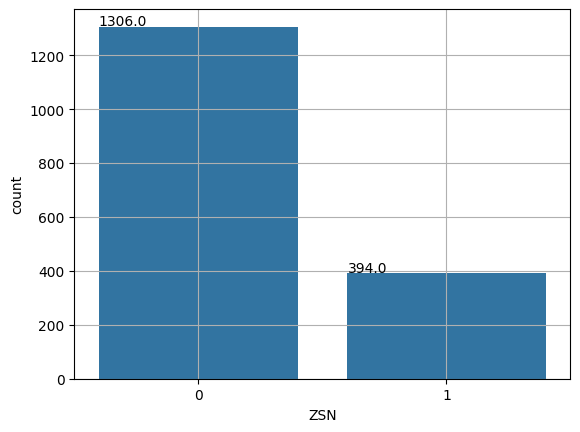

In [ ]:
ax = sns.barplot(x=y_c1.value_counts().index, y=y_c1.value_counts())
plt.grid()
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
y_c1.value_counts()

## Data split to Train+validation -- Test Split

# Train+validation - Test Split :


**Features selection**

In [ ]:
#split dataset
# Split the dataset into training+validation and testing sets
# 90% of the data is used for training and validation, and 10% for testing.
# Further split the training+validation set into 80% training and 20% validation.
X_train, X_test, y_train, y_test = train_test_split(X_C1, y_c1, train_size = 0.9, random_state = 42, shuffle = False)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.8, random_state = 42, shuffle = False)

In [ ]:
#quick statistical analysis of features for task 4
X_C1.describe()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,SIM_GIPERT,DLIT_AG,ZSN_A,...,NOT_NA_1_n,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,61.856974,0.626471,0.554835,2.316186,1.205286,1.160703,1.393258,0.033529,3.340220,0.194411,...,0.331953,0.113208,0.084767,0.283529,0.127059,0.666471,0.715882,0.741765,0.017647,0.202941
std,11.233395,0.483883,0.835816,2.363227,1.018208,0.789280,1.085916,0.180067,2.863578,0.648169,...,0.626459,0.386365,0.341142,0.450844,0.333137,0.471613,0.451126,0.437793,0.131704,0.402307
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,63.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,0.000000,3.340220,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
75%,70.000000,1.000000,1.000000,5.000000,2.000000,2.000000,2.000000,0.000000,7.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,92.000000,1.000000,3.000000,6.000000,4.000000,2.000000,3.000000,1.000000,7.000000,4.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Use Sequential Backward Selection (SBS) with a KNN classifier
# The goal is to select the 40 most relevant features by iteratively removing less important ones

from sklearn.neighbors import KNeighborsClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Backward Selection
knn = KNeighborsClassifier(n_neighbors=4)
sbs = SFS(knn,
          k_features = 40,
          forward = False,
          floating = False,
          scoring = 'accuracy',
          cv = 4,
          n_jobs = -1)
sbs = sbs.fit(X_train, y_train)

print('\nSequential Backward Selection (k=40):')
print(sbs.k_feature_idx_)
print('CV Score:')
print(sbs.k_score_)

indices = list(sbs.k_feature_idx_)
new_columns = X_train.columns[indices]
X_train_sbs = X_train[new_columns]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:73: FutureWarning: `fit_params` is deprecated and will be removed in version 1.6. Pass parameters via `params` instead.
  warnings.warn(



Sequential Backward Selection (k=40):
(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 27, 32, 40, 41, 42, 43, 45, 49, 81, 84, 85, 86, 87, 88, 96, 97)
CV Score:
0.7450980392156863


In [ ]:
# Use SelectKBest with the chi-square test to select 40 top features
# This method ranks features based on their statistical relationship with the target variable.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X_new = SelectKBest(chi2, k = 40).fit(X_train, y_train)
features_chosen = X_new.get_support()
new_columns_2 = X_train[X_train.columns[features_chosen]].columns

In [ ]:
# Compare the features selected by SBS and SelectKBest
# Count how many features are common between the two methods.

s=0
for val in new_columns:
    if val in new_columns_2:
        s=s+1
s

23

In [ ]:
#we choose sbs
X_train = X_train_sbs

**Features correlation**

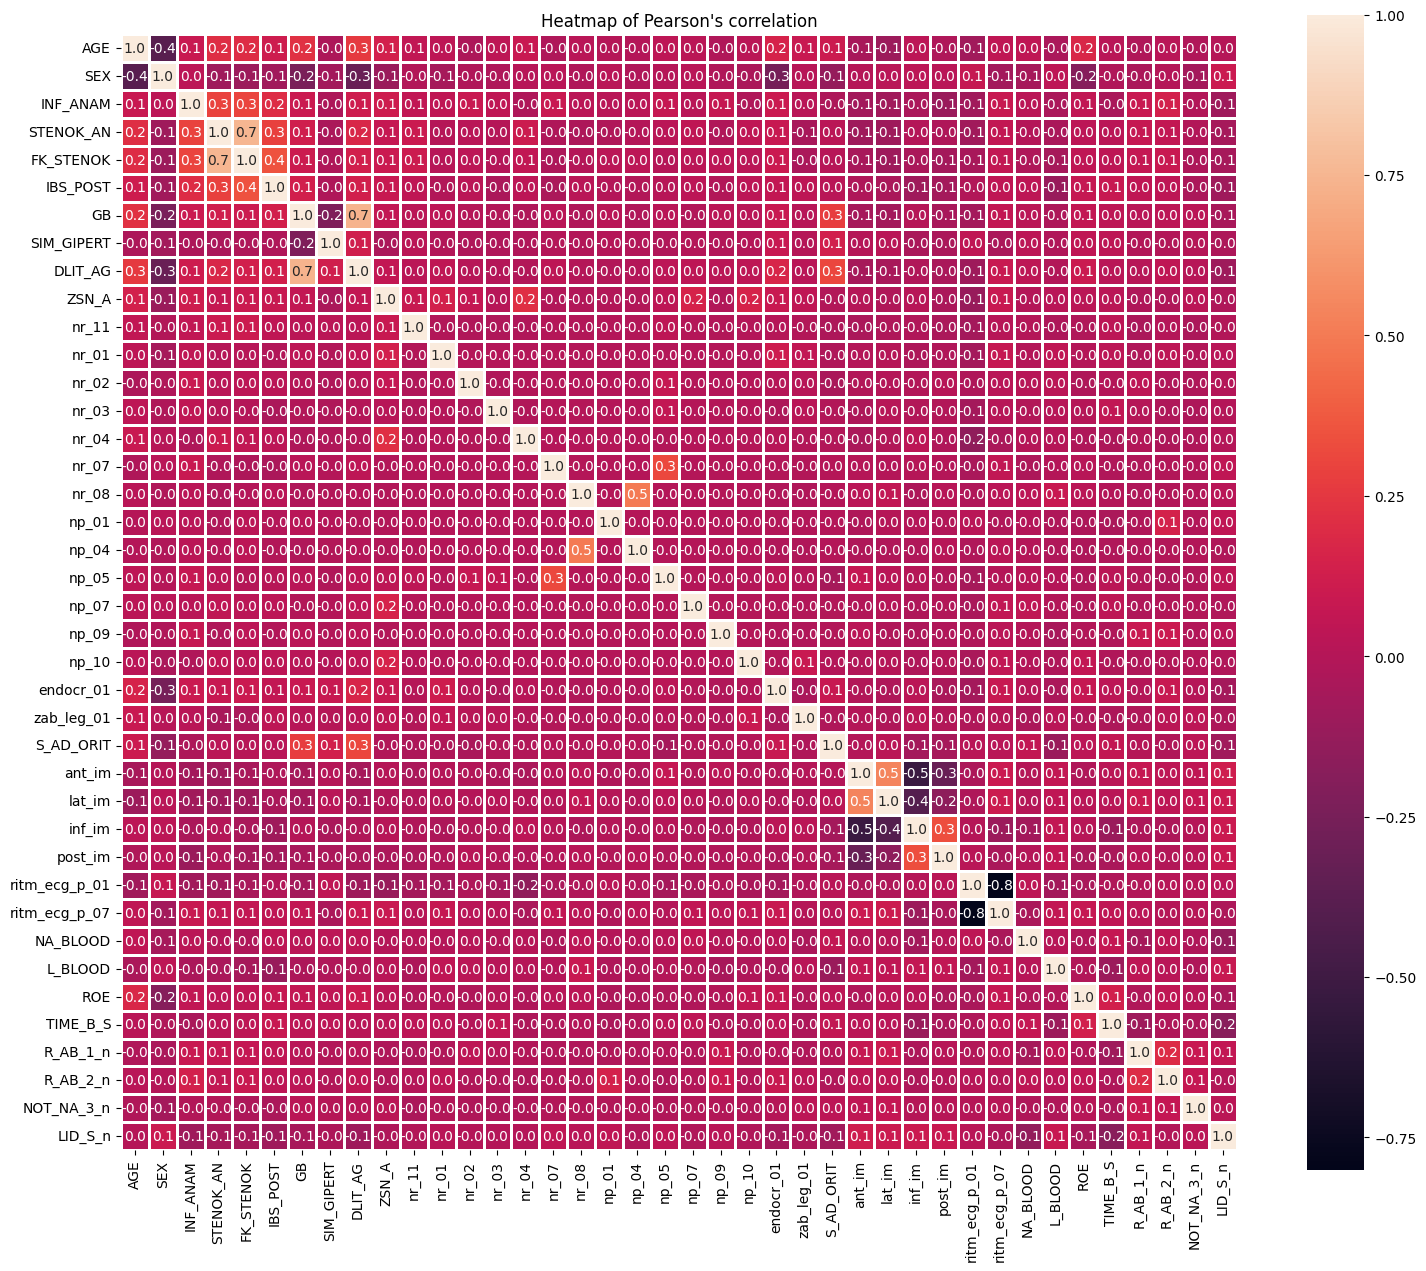

In [ ]:
# Compute Pearson's correlation between features in the training set
# Identify and visualize feature pairs with strong correlations using a heatmap.

pc_final = X_train.corr(method = 'pearson')
fig3, ax3 = plt.subplots(figsize = (18,15))
ax3.set_title("Heatmap of Pearson's correlation")
ax3 = sns.heatmap(pc_final, linewidths = 1, annot = True, fmt = '.1f', square = True)

In [ ]:
# Identify features with a correlation greater than 0.80 and remove them
# Reducing highly correlated features helps avoid redundancy and overfitting.

matrix = X_train.corr().abs()
#puts NaN values to the upper half and diagonal of the matrix
mask = np.triu(np.ones_like(matrix, dtype=bool))
reduced_matrix = matrix.mask(mask)
#find columns that meet the 0.80 threshold
to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] >= 0.8)]
print(len(to_drop))
#drop the cols
X_train = X_train.drop(to_drop, axis=1)
to_drop

1


['ritm_ecg_p_01']

In [ ]:
#apply same feature selection to validation and test sets
# X_train still contains ZSN
X_valid = X_valid[X_train.columns]
X_test = X_test[X_train.columns]
X_valid.shape
print(X_valid.columns.tolist())

['AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'IBS_POST', 'GB', 'SIM_GIPERT', 'DLIT_AG', 'ZSN_A', 'nr_11', 'nr_01', 'nr_02', 'nr_03', 'nr_04', 'nr_07', 'nr_08', 'np_01', 'np_04', 'np_05', 'np_07', 'np_09', 'np_10', 'endocr_01', 'zab_leg_01', 'S_AD_ORIT', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'ritm_ecg_p_07', 'NA_BLOOD', 'L_BLOOD', 'ROE', 'TIME_B_S', 'R_AB_1_n', 'R_AB_2_n', 'NOT_NA_3_n', 'LID_S_n']


**Outliers detection**

Identify non-binary features (those with more than 2 unique values)

Create boxplots for each non-binary feature to visualize potential outliers.

20


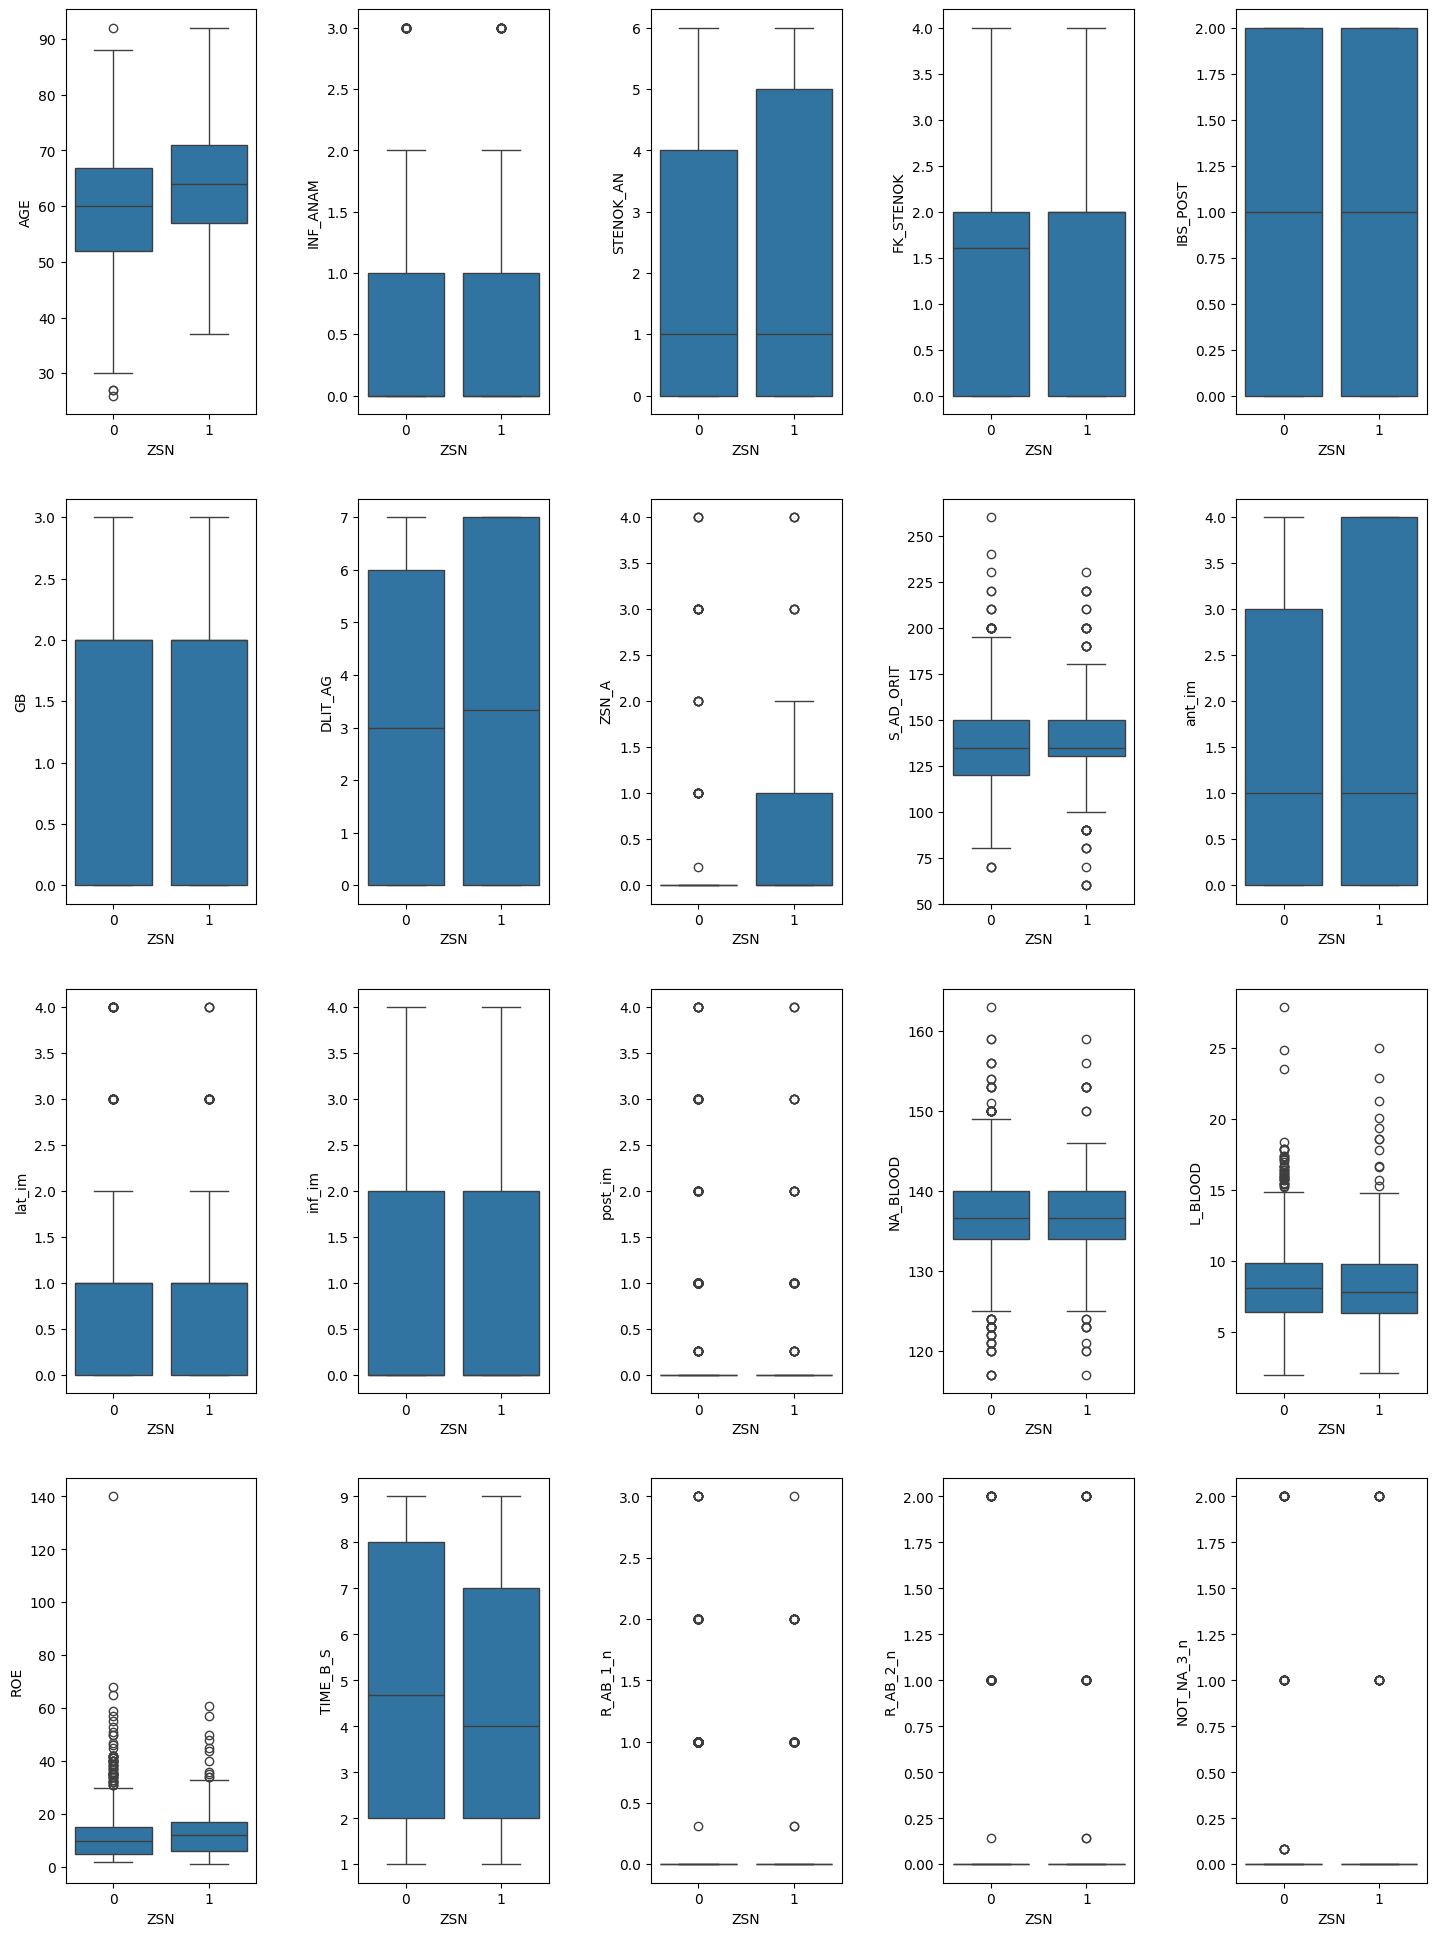

In [ ]:
# Identify non-binary features
not_binary_features = []
for col in X_train.columns:
    if X_train[col].nunique() > 2:
        not_binary_features.append(col)
print(len(not_binary_features))

# Calculate the number of rows needed for the subplots grid
n_features = len(not_binary_features)
n_cols = 5
n_rows = (n_features + n_cols - 1) // n_cols  # Ensure enough rows for all features

# Create the subplots
fig, positions = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))

# Flatten the positions array in case n_rows or n_cols equals 1
positions = positions.flatten()

# Prepare the data for boxplots
df_non_binary = X_train[not_binary_features].copy()
df_non_binary['ZSN'] = y_train

# Create boxplots for each feature
for y, val in enumerate(not_binary_features):
    sns.boxplot(x='ZSN', y=val, data=df_non_binary, ax=positions[y])
    positions[y].set_ylabel(val)

# Remove any empty subplots (if not enough features to fill the grid)
for pos in range(y + 1, len(positions)):
    fig.delaxes(positions[pos])

# Adjust layout for better spacing
fig.tight_layout(pad=3.0)


In [ ]:
#isolation forest

# Apply Isolation Forest to detect outliers in the training set.
# Outliers are identified as -1 in the predictions.

from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state = 42).fit(X_train)
iso_forest_predictions = clf.predict(X_train)
#-1s identify outliers
outliers = 0
for val in iso_forest_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

Identified outliers: 101.


In [ ]:
#local outlier factor

# Use LOF to detect outliers based on the density of local neighborhoods.
# Compare the LOF outliers with those identified by the Isolation Forest.

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=2)
lof_predictions = lof.fit_predict(X_train)
#-1s identify outliers
print(lof.negative_outlier_factor_)
#the higher, the more normal
#inliers have a score close to -1
outliers = 0
for val in lof_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

[-1.03191009 -0.99285302 -1.07957721 ... -1.02548489 -0.9704464
 -1.17303627]
Identified outliers: 23.


In [ ]:
#predictions in common
(lof_predictions == iso_forest_predictions).sum()

1102

In [ ]:
#one class svm

# Apply One-Class SVM to detect outliers in the training data.
# Outliers are identified as -1 in the predictions.

from sklearn import svm
svm = svm.OneClassSVM(nu = 0.1, kernel = "rbf", gamma = 0.1)
svm.fit(X_train)
svm_predictions = svm.predict(X_train)
#-1s identify outliers
outliers = 0
for val in svm_predictions:
    if val == -1:
        outliers = outliers +1
print(f"Identified outliers: {outliers}.")

Identified outliers: 821.


In [ ]:
#z-score

# Use Z-Score to filter outliers based on their distance from the mean.

X_train['ZSN'] = y_train
from scipy import stats
train_z = X_train[(np.abs(stats.zscore(X_train)) < 3).all(axis = 1)]
print(f"X_train : {len(X_train)}. train_z : {len(train_z)}.")

X_train : 1224. train_z : 771.


In [ ]:
# Compare the inliers (non-outliers) identified by the Z-Score with those of the Isolation Forest.

df_forest = X_train[iso_forest_predictions==1]
inliers_in_common = 0
for val in train_z.index:
    if val in df_forest.index:
        inliers_in_common = inliers_in_common +1
inliers_in_common

766

**Dimensionality Reduction**

0.30357540373833936


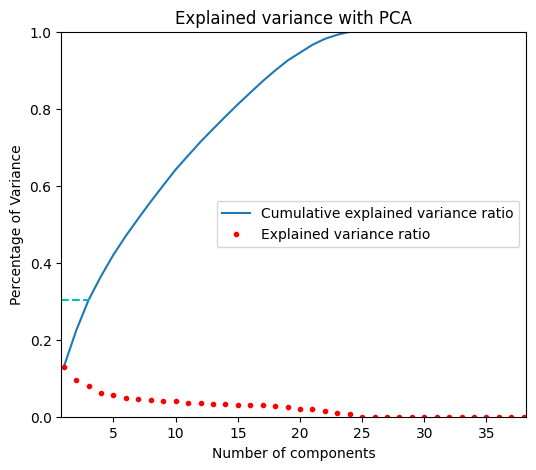

In [ ]:
#PCA

# Perform PCA to reduce the number of features while retaining most of the variance.
# Standardize the features before applying PCA.

#remove label before applying PCA
target = train_z['ZSN']
train_z = train_z.drop(columns = 'ZSN')

from sklearn.preprocessing import StandardScaler
features = train_z.columns
# Separating out the features
x = train_z.loc[:, features].values
# Standardizing the features
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

from sklearn.decomposition import PCA
n_c = 38
pca = PCA(n_components = n_c)
pca.fit(x)
fig, ax = plt.subplots(figsize = (6, 5))
plt.xlabel('Number of components')
plt.ylabel('Percentage of Variance')
plt.title('Explained variance with PCA')
ax.plot(np.linspace(1, n_c, n_c), np.cumsum(pca.explained_variance_ratio_))
ax.plot(np.linspace(1, n_c, n_c), pca.explained_variance_ratio_, marker = '.', linestyle = '', color = 'r')
ax.plot([0.8, 3], [np.cumsum(pca.explained_variance_ratio_)[2], np.cumsum(pca.explained_variance_ratio_)[2]], c = 'c', linestyle = '--')
print(np.cumsum(pca.explained_variance_ratio_)[2])
ax.legend(('Cumulative explained variance ratio', 'Explained variance ratio', 'Threshold (0.9)'), loc = 7)
ax.legend(('Cumulative explained variance ratio', 'Explained variance ratio'), loc = 7)
ax.set_ylim(0,1)
ax.set_xlim(0.8, n_c + 0.2)
plt.show()

In [ ]:
#25 components cover almost all the cumulative explained variance ratio
n_components_PCA = 25
pca = PCA(n_components = n_components_PCA)
train_pca = pca.fit_transform(x)
valid_pca = pca.transform(X_valid)
test_pca = pca.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


In [ ]:
#LDA
# Use LDA to reduce dimensionality while taking the target variable into account.

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 1)
train_lda = lda.fit(train_z, target).transform(train_z)

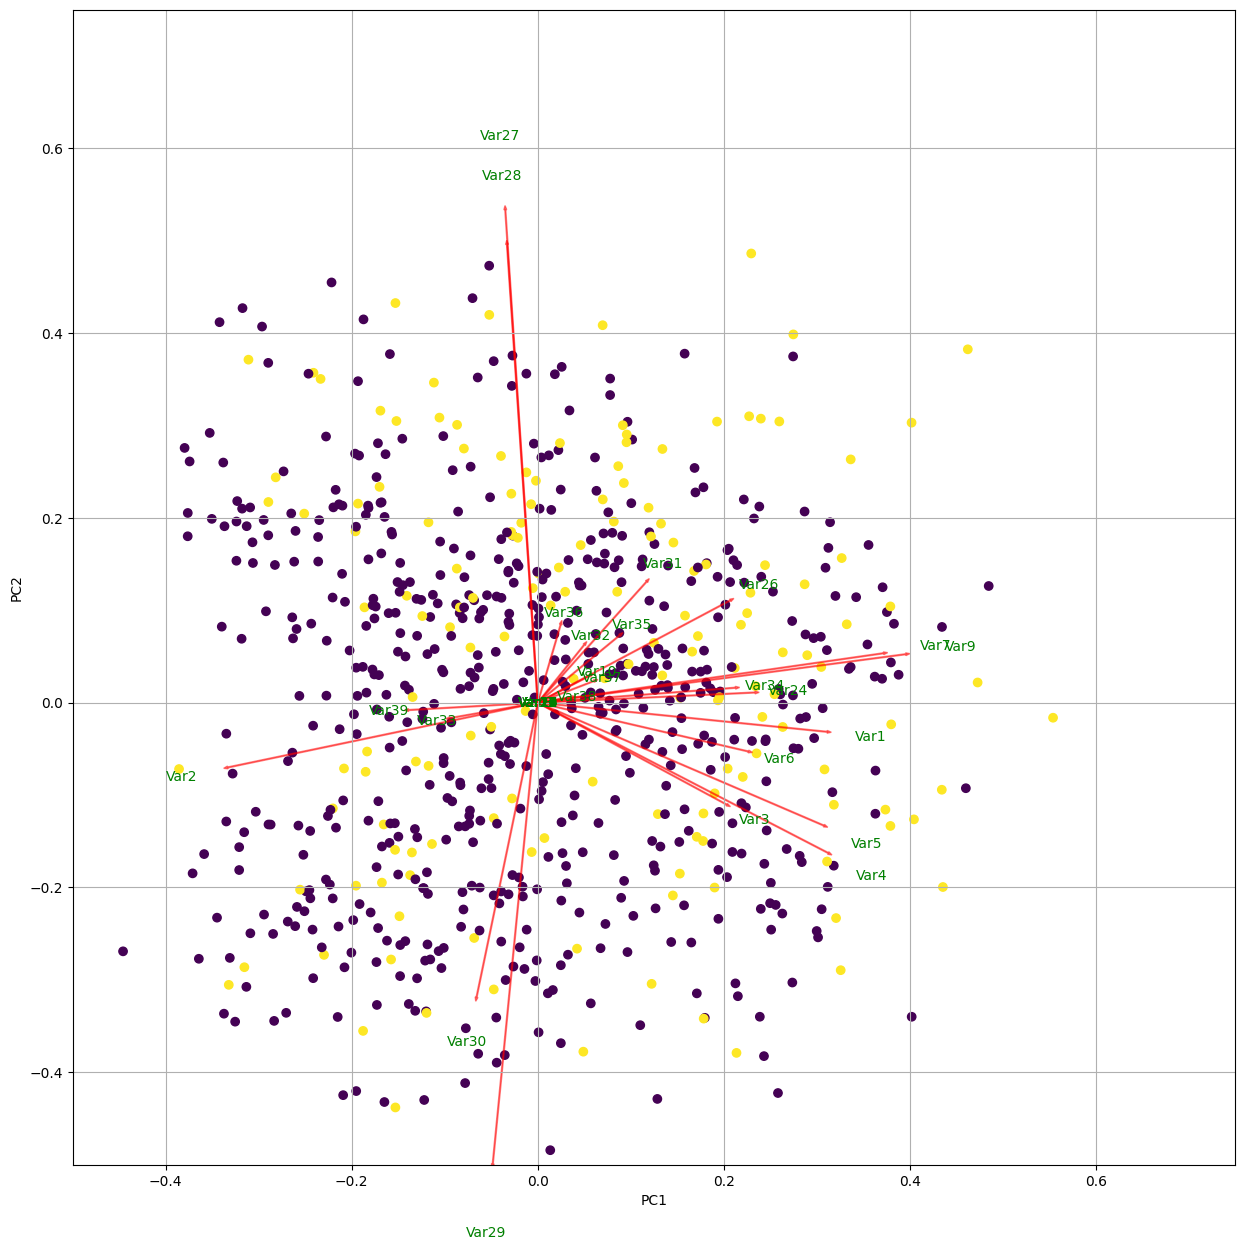

In [ ]:
#BIPLOT test
# Create a biplot to visualize the relationships between the principal components and the original features.
# Helps to understand how each feature contributes to the new PCA components.

def biplot(score, coeff, labels = None):
    plt.figure(figsize = (15, 15))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c = target, label = target)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'r', alpha = 0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
    plt.xlim(-0.5, 0.75)
    plt.ylim(-0.5, 0.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

biplot(train_pca[:, 0 : 2], np.transpose(pca.components_[0 : 2, :]))
plt.show()


In the PCA biplot, ant_im(Var27) and lat_im (Var28) stand out as key contributors, with long arrows nearly perpendicular to PC1, indicating a strong contribution to PC2 and a positive correlation with each other. These variables influence the variance in PC2 more significantly. In contrast, post_im(Var30) and inf_im(Var29) have long arrows pointing in the opposite direction of ant_im and ant_im(Var27), suggesting a negative correlation between these variables and a strong contribution to PC1.

DLIT_AG(Var9) and GB(Var7) have shorter arrows compared to ant_im(Var27) and lat_im (Var28), indicating a smaller contribution to the variance. However, these arrows are more aligned with PC1, showing some influence there, though less impactful.

Other variables, such as AGE (Var1), FK_STENOK(Var5), and STENOK_AN(Var4), have shorter arrows, suggesting limited contributions to the variance in both PC1 and PC2. Their directions are less aligned with either principal component, indicating weaker overall influence on the dataset’s structure.

Lastly, SEX (Var2) points distinctly to the left, indicating a unique relationship with the variance and possibly contributing in a direction not captured as strongly by PC1 or PC2.

z_train was composed of 771 rows. X_train_cc is composed of 316 rows.


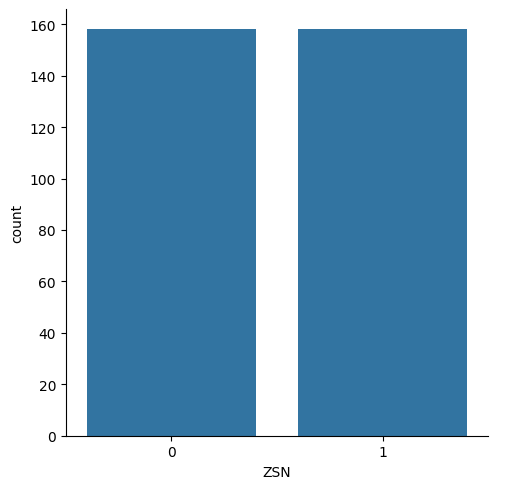

In [ ]:
#cluster centroids
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 42)
X_train_cc, y_train_cc = cc.fit_resample(train_z, target)
print(f"z_train was composed of {len(train_z)} rows. X_train_cc is composed of {len(X_train_cc)} rows.")
copia = X_train_cc.copy(deep = True)
copia['ZSN'] = y_train_cc
_ = sns.catplot(x = 'ZSN', kind = 'count', data = copia)

In [ ]:

pca = PCA(n_components=25)  # On réduit à 2 composantes principales
X_train_pca = pca.fit_transform(X_train_cc)

PCA apres le undersampling

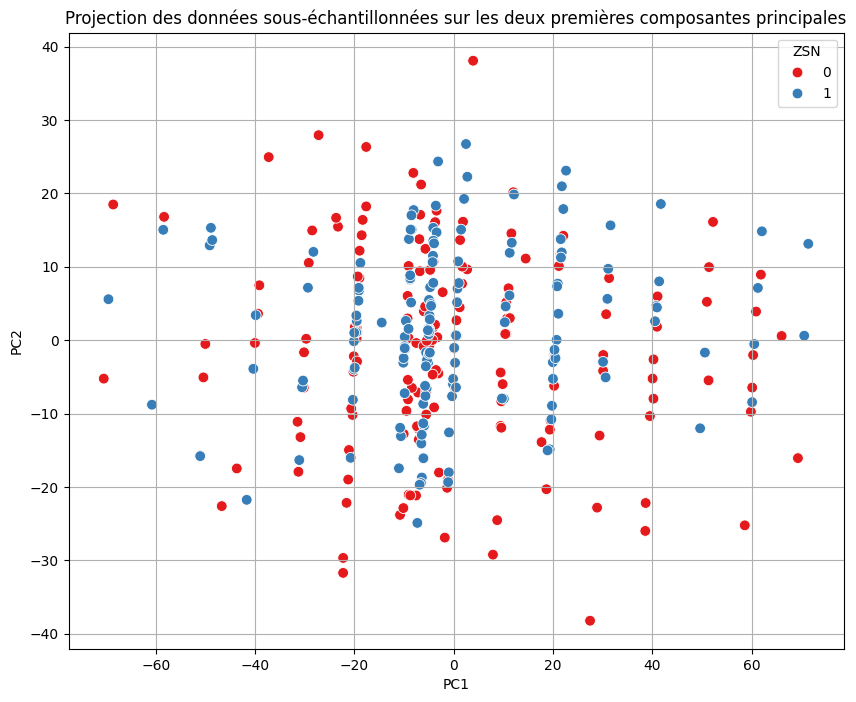

Variance expliquée par PC1 : 0.70
Variance expliquée par PC2 : 0.16


In [ ]:
# Import des librairies nécessaires pour le PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assurez-vous d'importer pandas

# Réaliser le PCA avec 25 composantes principales
n_components_PCA = 2
pca = PCA(n_components=n_components_PCA)  # On réduit à 25 composantes principales
X_train_pca = pca.fit_transform(X_train_cc)

# Création d'un DataFrame pour les résultats du PCA en utilisant seulement les 2 premières composantes
pca_df = pd.DataFrame(data=X_train_pca[:, :2], columns=['PC1', 'PC2'])  # On utilise seulement les 2 premières colonnes
pca_df['ZSN'] = y_train_cc  # Ajout de la variable cible (ZSN)

# Visualisation des résultats du PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='ZSN', data=pca_df, palette='Set1', s=60)
plt.title('Projection des données sous-échantillonnées sur les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Affichage de la variance expliquée par chaque composante principale
explained_variance = pca.explained_variance_ratio_
print(f"Variance expliquée par PC1 : {explained_variance[0]:.2f}")
print(f"Variance expliquée par PC2 : {explained_variance[1]:.2f}")


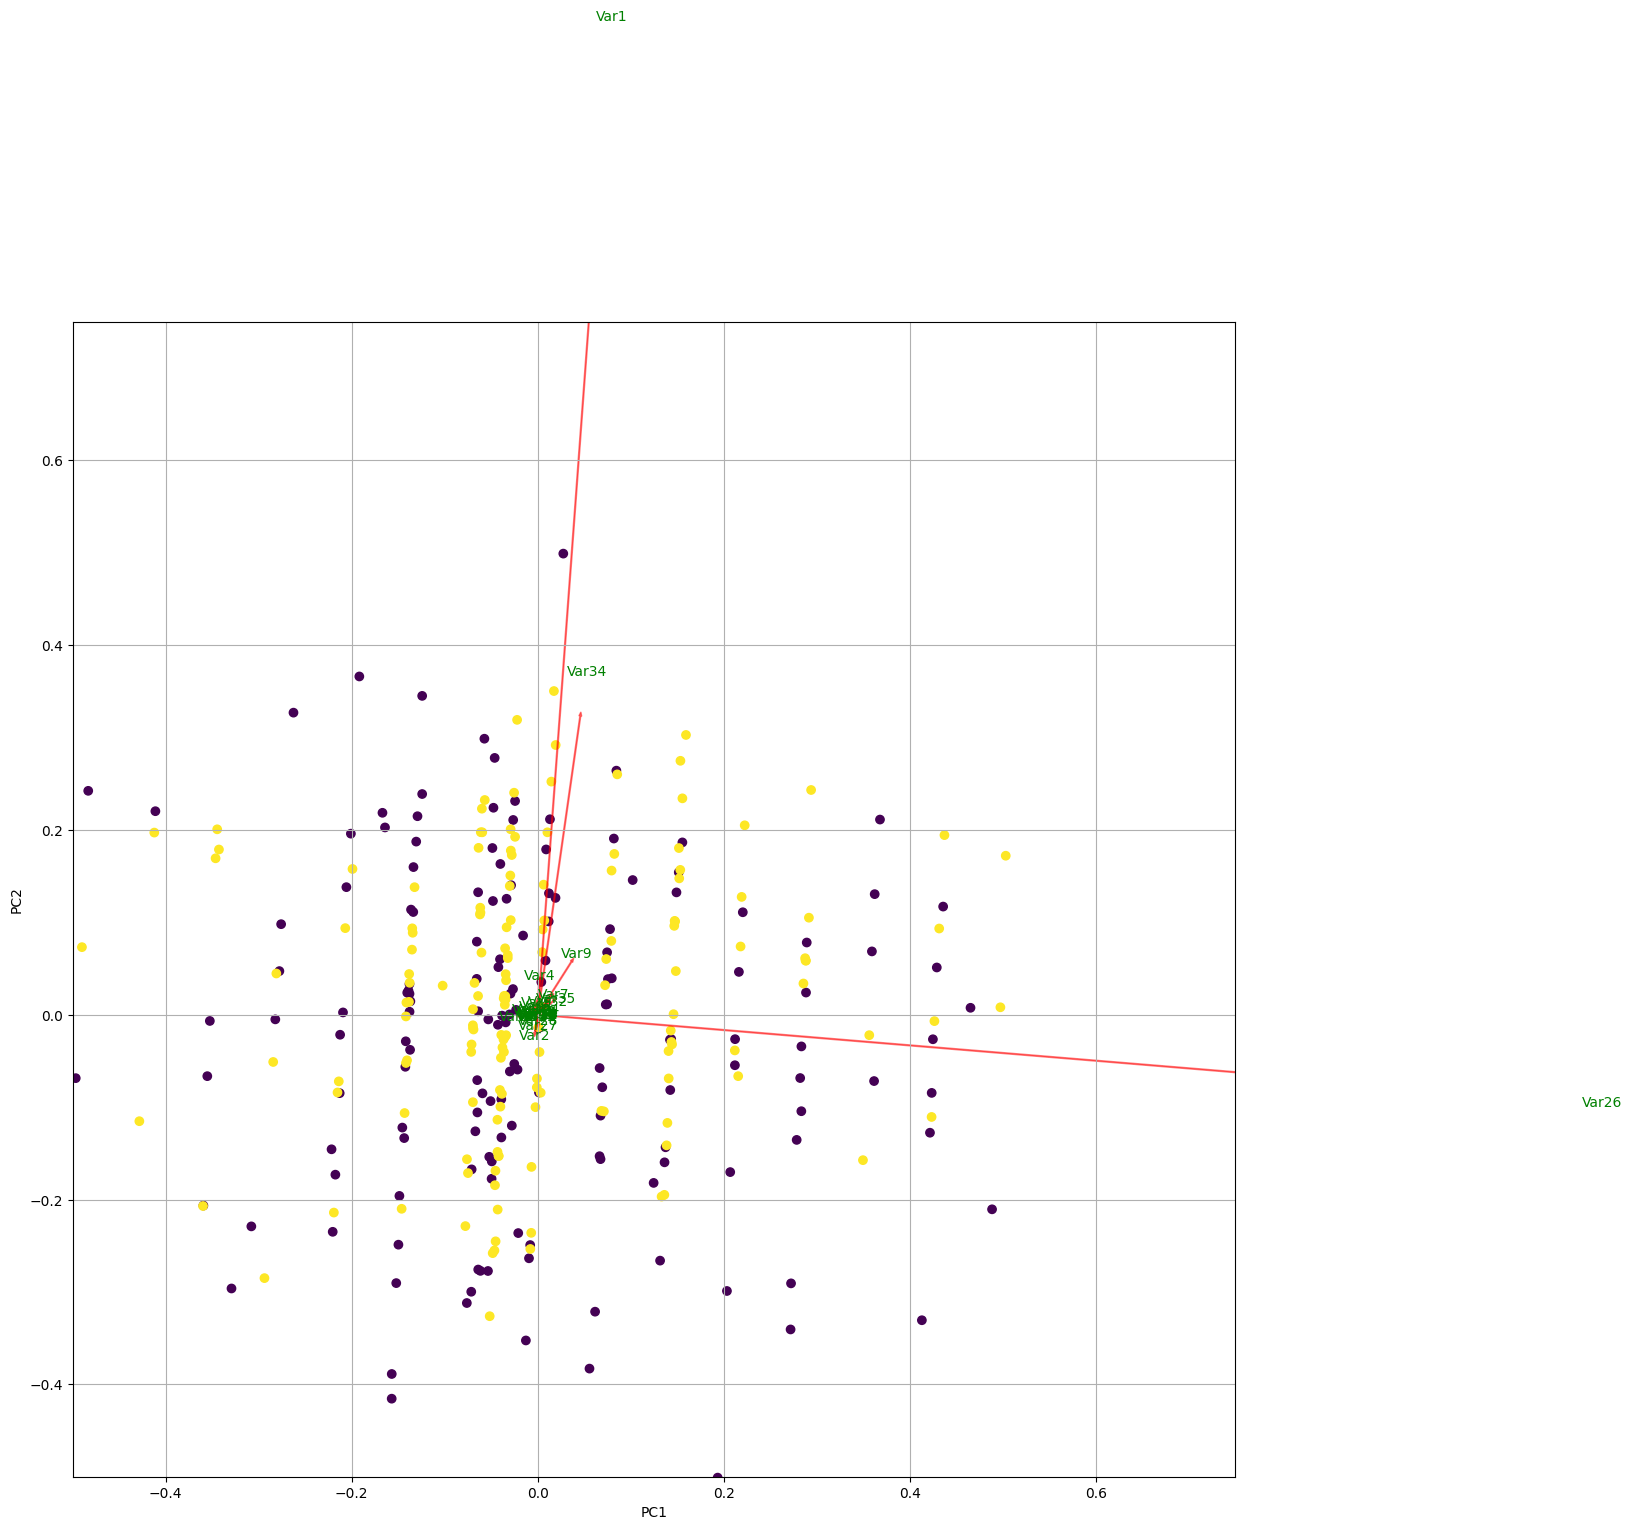

In [ ]:
# Étape 2 : Appliquer PCA
pca = PCA(n_components=2)  # Ajustez le nombre de composantes selon vos besoins
X_train_pca = pca.fit_transform(X_train_cc)

# Étape 3 : Mise à jour de la fonction biplot pour utiliser PCA sur le sous-échantillon
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(15, 15))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=y_train_cc, label=y_train_cc)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-0.5, 0.75)
    plt.ylim(-0.5, 0.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Étape 4 : Tracer le biplot
biplot(X_train_pca, np.transpose(pca.components_[0:2, :]), labels=None)  # Ajoutez des labels si nécessaire
plt.show()

In the PCA biplot, AGE (Var1) and TIME_B_S(Var34) are positively correlated, with AGE (Var1) being more influential due to its longer length. AGE's (Var1) near-perpendicular orientation to PC1 suggests a stronger relationship with PC2. TIME_B_S (Var34), while correlated with AGE (Var1), is less significant because of its shorter length. S_AD_ORIT  (Var26), with its long arrow perpendicular to PC2, indicates it plays a strong role in explaining the variance captured by PC1. This suggests prioritizing AGE (Var1) in further analysis, while FK_STENOK(Var5) may offer less value. S_AD_ORIT's(Var26) influence on PC1 also warrants closer examination.

z_train was composed of 771 rows. X_train_smote is composed of 1226 rows.


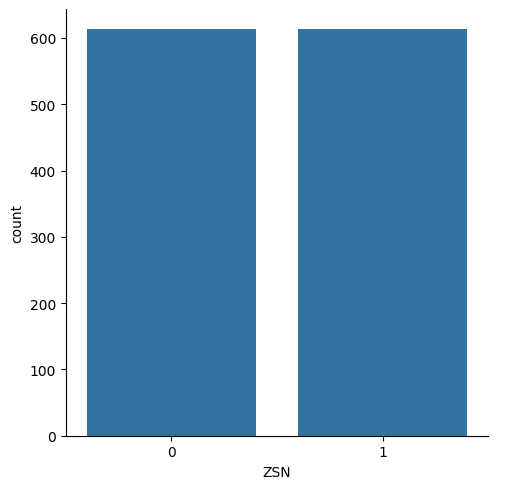

In [ ]:
#SMOTE
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train_smote, y_train_smote = sm.fit_resample(train_z, target)
print(f"z_train was composed of {len(train_z)} rows. X_train_smote is composed of {len(X_train_smote)} rows.")
copia = X_train_smote.copy(deep = True)
copia['ZSN'] = y_train_smote
_ = sns.catplot(x = 'ZSN', kind = 'count', data = copia)

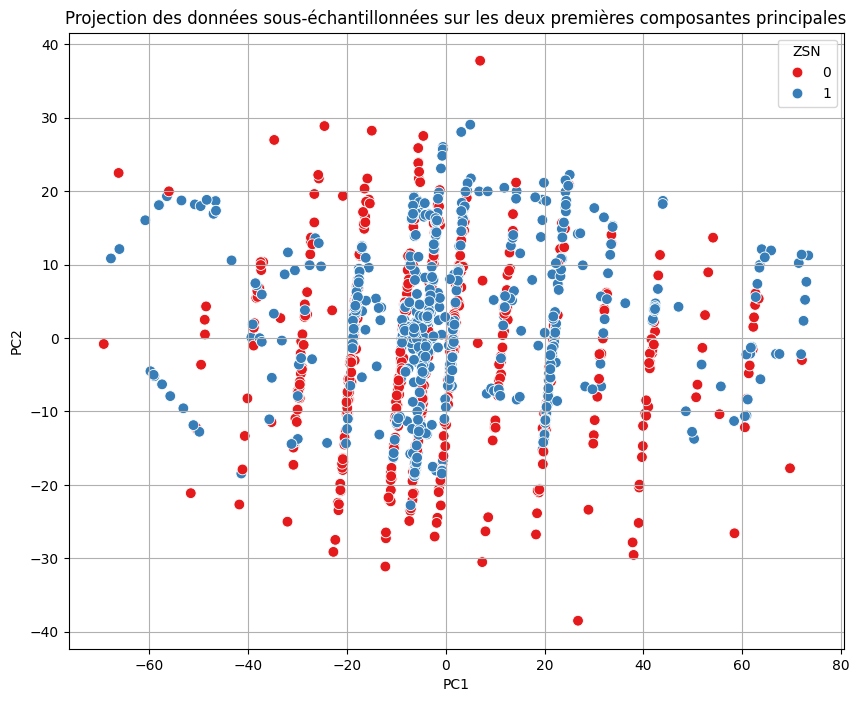

Variance expliquée par PC1 : 0.68
Variance expliquée par PC2 : 0.16


In [ ]:
# Import des librairies nécessaires pour le PCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd  # Assurez-vous d'importer pandas

# Réaliser le PCA avec 25 composantes principales
n_components_PCA = 25
pca_smote = PCA(n_components=n_components_PCA)  # On réduit à 25 composantes principales
X_train_pca1 = pca_smote.fit_transform(X_train_smote)

# Création d'un DataFrame pour les résultats du PCA en utilisant seulement les 2 premières composantes
pca_df1 = pd.DataFrame(data=X_train_pca1[:, :2], columns=['PC1', 'PC2'])  # On utilise seulement les 2 premières colonnes
pca_df1['ZSN'] = y_train_smote  # Ajout de la variable cible (ZSN)

# Visualisation des résultats du PCA
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='ZSN', data=pca_df1, palette='Set1', s=60)
plt.title('Projection des données sous-échantillonnées sur les deux premières composantes principales')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid(True)
plt.show()

# Affichage de la variance expliquée par chaque composante principale
explained_variance1 = pca_smote.explained_variance_ratio_
print(f"Variance expliquée par PC1 : {explained_variance1[0]:.2f}")
print(f"Variance expliquée par PC2 : {explained_variance1[1]:.2f}")


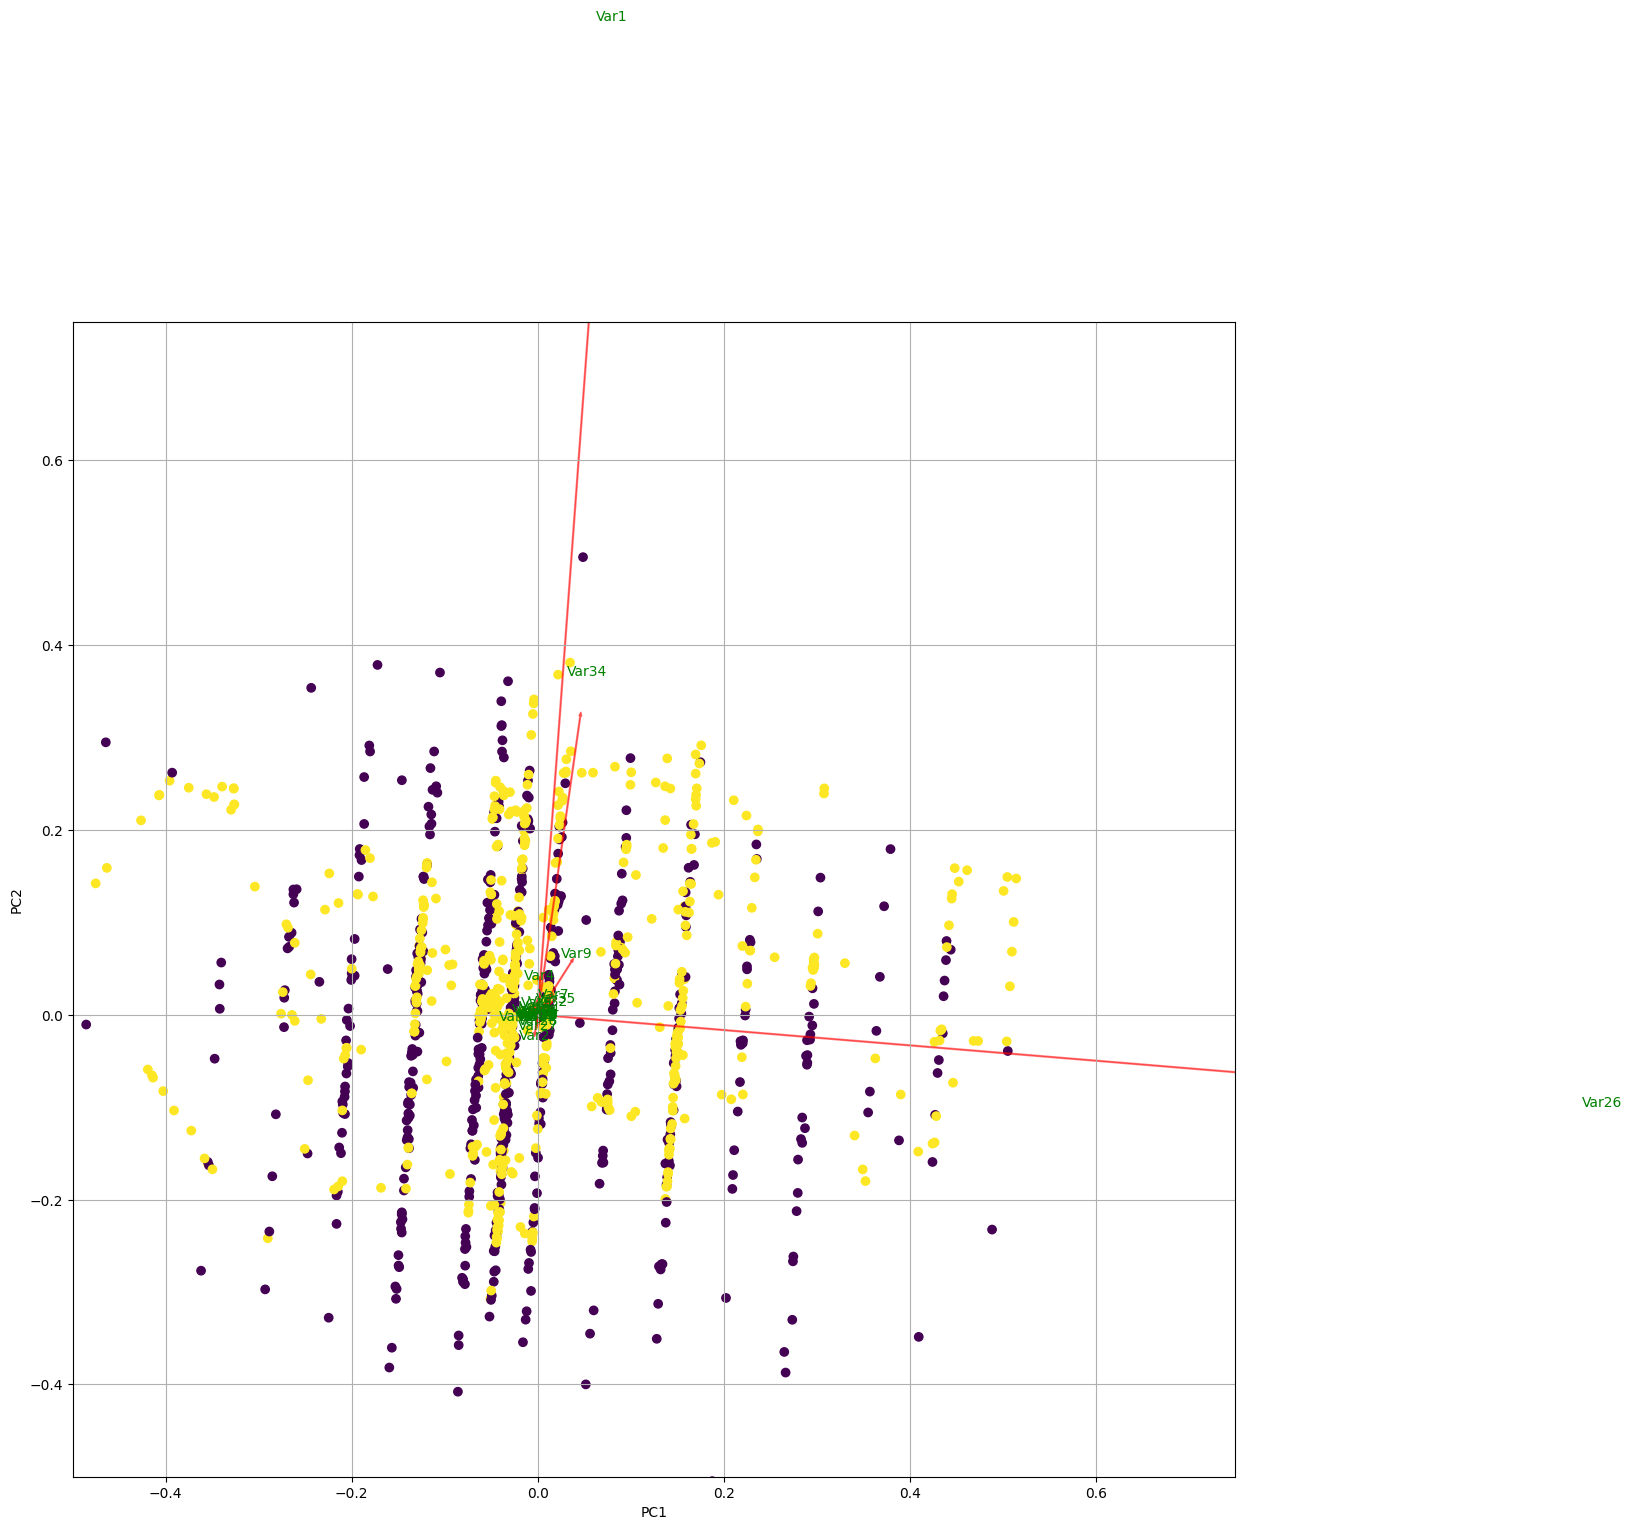

In [ ]:


# Étape 3 : Mise à jour de la fonction biplot pour utiliser PCA sur le sous-échantillon
def biplot(score, coeff, labels=None):
    plt.figure(figsize=(15, 15))
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=y_train_smote, label=y_train_cc)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='g', ha='center', va='center')
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='g', ha='center', va='center')
    plt.xlim(-0.5, 0.75)
    plt.ylim(-0.5, 0.75)
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()

# Étape 4 : Tracer le biplot
biplot(X_train_pca1, np.transpose(pca.components_[0:2, :]), labels=None)  # Ajoutez des labels si nécessaire

Save the Cleaned Data

In [ ]:
train_z.to_csv('cleaned_file.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Apply standardization on the entire DataFrame (excluding categorical columns if any)
data_scaled = scaler.fit_transform(train_z)

# Convert back to a DataFrame if needed
data_scaled = pd.DataFrame(data_scaled, columns=train_z.columns)

data_scaled.to_csv('cleaned_file1.csv', index=False)

In [ ]:
print(data_scaled.head())

        AGE       SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST        GB  \
0  1.537070  0.674327  2.582582  -0.406678  -0.068710  1.107131  1.503629   
1 -0.381888  0.674327  0.978093  -0.846592  -1.037263 -1.323535 -1.272024   
2  0.054239  0.674327 -0.626396  -0.846592  -1.037263  1.107131  1.503629   
3  0.403141  0.674327 -0.626396  -0.406678   0.899843 -0.108202 -1.272024   
4  0.054239  0.674327 -0.626396  -0.846592  -1.037263  1.107131  0.578411   

   SIM_GIPERT   DLIT_AG     ZSN_A  ...   post_im  ritm_ecg_p_07  NA_BLOOD  \
0         0.0  1.395037 -0.287863  ... -0.377666       2.001623  0.267812   
1         0.0 -1.061925 -0.287863  ... -0.377666      -0.499595 -0.824209   
2         0.0  1.395037 -0.287863  ... -0.377666       2.001623 -0.824209   
3         0.0 -1.061925 -0.287863  ... -0.377666       2.001623  0.004079   
4         0.0  1.044042 -0.287863  ...  4.014456      -0.499595  0.004079   

    L_BLOOD       ROE  TIME_B_S  R_AB_1_n  R_AB_2_n  NOT_NA_3_n   LID_S_n 